# Linear Regression

In [4]:
#Uploading the libraries that we will need

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Upload the data set (make sure it's in the same folder as this notebook when working with jupyter)

In [5]:
housing=pd.read_csv("Housing_price.csv")

In [6]:
#Show the first 5 rows of our datatset
housing.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished
0,0.396564,0.6,0.333333,0.666667,0.666667,1.000000,1,0,0,0,1,1,0,0
1,0.502405,0.6,1.000000,1.000000,1.000000,0.909091,1,0,0,0,1,0,0,0
2,0.571134,0.4,0.333333,0.333333,0.666667,0.909091,1,0,1,0,0,1,1,0
3,0.402062,0.6,0.333333,0.333333,1.000000,0.906061,1,0,1,0,1,1,0,0
4,0.396564,0.6,0.000000,0.333333,0.666667,0.836364,1,1,1,0,1,0,0,0


### Correaltion matrix


<Axes: >

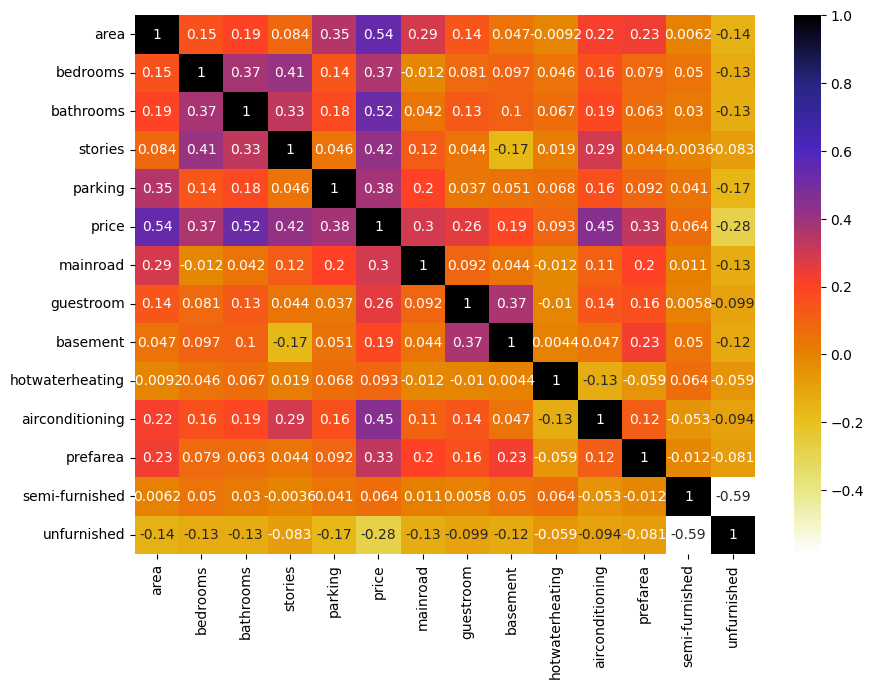

In [7]:
#Create the correlation matrix
cor_matrix = housing.corr()

#Set the size of the figure (optional)
plt.figure(figsize=(10,7))

#Plot the coorelation matrix
"""
cor_matrix           : Correlation matrix that we have created
annot=True           : Show the values (if set to False you won't see the numbers on the matrix)
cmap=plt.cm.CMRmap_r : Set the colors we want to use
"""
sns.heatmap(cor_matrix,annot=True,cmap=plt.cm.CMRmap_r)

## Creating our X(set of features) and Y(set of labels)

In [8]:
X=housing.drop(['price'],axis=1) #We take all the columns from housing except price (we use axis=1 to drop vertically)
Y=housing['price'] #We take only the column price

#We split our data set to train and test, setting the poportion of test to 20% and the train _automatically_ to 80% (the random state is used to ensure the occurence of the same results of the learning metrics)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Creating our Learning Model ; LinearRegression

In [9]:
LR=LinearRegression()

## Fit the model to our X_train,Y_train (that means that we are telling him to fing the appropriate weights w1,w2,...,wn and bias b that minimise the cost function J(w,b)

In [10]:
LR.fit(X_train,Y_train)

LinearRegression()

In [11]:
#Show the ceifficient after the fit
LR.coef_

array([ 0.2972594 ,  0.03323753,  0.28427137,  0.10583808,  0.0584005 ,
        0.03185454,  0.02005282,  0.03378798,  0.05927705,  0.0685218 ,
        0.05453598, -0.01098544, -0.03581343])

## Predict some values (NB : this step is not necessary to calculate the score)

In [12]:
y_pred = LR.predict(X_test)
y_pred

array([0.29564103, 0.47400193, 0.11773708, 0.24779873, 0.13373561,
       0.15430953, 0.33435278, 0.39983948, 0.08423004, 0.07613901,
       0.68112896, 0.09074349, 0.12303868, 0.14239299, 0.16719382,
       0.3041721 , 0.11133883, 0.26286777, 0.22506943, 0.15778027,
       0.34847404, 0.35818126, 0.08492088, 0.25777632, 0.3025842 ,
       0.50262547, 0.1273412 , 0.2979999 , 0.55356943, 0.14275447,
       0.41044961, 0.135507  , 0.42930367, 0.21227171, 0.15649966,
       0.35385061, 0.26481911, 0.22622327, 0.12478294, 0.24645497,
       0.24381323, 0.1530545 , 0.47236751, 0.19338505, 0.17310292,
       0.21859144, 0.43354477, 0.1980364 , 0.17483419, 0.14438333,
       0.47778499, 0.09112852, 0.22439399, 0.23951707, 0.16709936,
       0.08042936, 0.49766486, 0.10133043, 0.21554823, 0.08800584,
       0.26764588, 0.15881901, 0.29369185, 0.21401465, 0.25527346,
       0.2521542 , 0.46994299, 0.14737653, 0.35951835, 0.38511639,
       0.26175056, 0.29687734, 0.23726502, 0.53841882, 0.15319

## Calculate the score to evaluate the model performence

In [13]:
LR.score(X_test,Y_test)

0.6529242642153177

---

## We will do the same exact thing but this time without using the semi-furnished column (since it's the least correlated with price : cor(price,semi-furnished)=0.064 make sure to compare using the absolute value of the correlation coeifficient)

In [14]:
X=housing.drop(['price','semi-furnished'],axis=1)
Y=housing['price'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Notice that we don't need to create a new model, we can simply fit it to another X_train,Y_train (that means changing it's weights so it's correspond to the new dataset)

LR.fit(X_train,Y_train)

LR.score(X_test,Y_test)

0.6557150844190329

# Conclusion
> Notice that we get a slight incrementation of 0.0027908202037152385 in the score of the model when removing that column (it's not a general technique but it can be useful in some cases)

# Thank You
# MAJDOUB Adnane
# ENSIAS AI Club